# Time Series Object Oriented OO

December 29, 2022.

@author: Oscar A. Trevizo

Object Oriented Time Series class.

Use Case: Pandas, Seaborn, time series DataFrame created in "use_case_world_migration_create_time_series.ipynb", ARIMA models

- Pandas: data format transformation, converting to datetime, setting index.
- Opbject Oriented (OO) time series.
- Seaborn lineplots.
- Matplotlib, histograms, q-q plots.
- train, test datasets and predictions.
- Statsmodels sts.seasonal_decompose
- ARIMA models.
- Auto Correlation Function (ACF) and Partial ACF (PACF).
- Augmented Dickey-Fuller (ADF) method to test stationary.



# Python Libraries and Functions

This section is located here to include all Python libraries and functions in one place before the actual wrangling and analytics code begins to better organize the scripts that follow.

### _Python Libraries_

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np
import numpy.random as nr
from math import log, sqrt
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot, plot_regress_exog
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.tsa.seasonal as sts
from statsmodels.tsa.seasonal import STL
import statsmodels.tsa.arima_process as arima
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing
from statsmodels.tsa.api import VAR
import statsmodels.graphics.tsaplots as splt
import pmdarima as pm
from pmdarima import model_selection
import warnings

%matplotlib inline


### DELETE ME _Python Functions_

In [2]:
##
#
# Functions
#
##


# A function to plot the time series stored in a DataFrame, column by column.
# def lineplots_ts(df):
#     """
#     INPUTS: 
#     df: DataFrame with numeric columns
    
#     RETURNS: Nothing
    
#     The plots aim to display time series in general.
#     Each numeric column of the df is expected to be a time series.
#     It plots each numeric column.
#     """
#     no_of_plots = df.shape[1]
#     fig, ax = plt.subplots(df.shape[1], 1, figsize=(10, 2*no_of_plots))
#     ax = ax.flatten()

#     for i in range(df.shape[1]):
#         if is_numeric_dtype(df[df.columns[i]]):
#             sns.lineplot(x = df.index, y = df.columns[i], data = df, ax=ax[i])
#             ax[i].axhline(y = df[df.columns[i]].mean(), color = 'r', linestyle = '-')



### _Python Object Oriented (OO)_

In [3]:
##
#
# Objected Oriented
#
##

class TimeSeries:
    def __init__(self, ts, train_size=0):
        """
        Class instantiates object that contains a time series.
        
        Parameters
        ----------
        ts: 2D array or DataFrame with index type datatime and one numeric columns.
        train_size: int, to create train and test sets.
        
        Returns
        -------
        tain, test: time series train and test
        """
        #your code here
        self.ts = ts
        self.train_size = train_size
        
        if train_size > 0:
            # needs from pmdarima import model_selection
            self.train, self.test = model_selection.train_test_split(self.ts, train_size=self.train_size)
            
    def lineplot(self):
        """
        The plots aim to display time series self.ts.
        """
        _,ax = plt.subplots(figsize=(12,4))
        sns.lineplot(x = self.ts.index, y = self.ts)

                    
    def plot_hist_qq(self, title='time series', bins=40):
        """
        Plots histogram and Q-Q to visualize distribution and Normality.
        
        Parameters
        ----------
        title: string with title for the histogram plot.
        bins: int with number of bins to plot the histogram.
        """
        # plot_hist_and_qq(sel.ts, title=title, bins=bins)
        
        _,ax = plt.subplots(1,2,figsize=(10,4))
        
        ## Plot the histogram with labels
        self.ts.hist(ax = ax[0], bins = bins, alpha = 0.5);
        ax[0].set_xlabel('Value');
        ax[0].set_ylabel('Frequency');
        ax[0].set_title('Histogram of ' + title);
        ## Plot the q-q plot on the other axes
        ss.probplot(self.ts, plot = ax[1]);

        
    def acf_pacf_plots(self):
        """
        Plots Auto Correlation Function (ACF) and Partial ACF (PACF).
        """
        lags = len(self.ts) // 3
        print('lags = ', lags)
        _,ax = plt.subplots(2,1, figsize=(8,8))
        _=splt.plot_acf(self.ts, lags = lags, ax=ax[0]);
        _=splt.plot_pacf(self.ts, lags = lags, method='yw', ax=ax[1]);
        
    def test_ADF_stationary(self):
        """
        Augmented Dickey-Fuller (ADF) method to test stationary.
        
        Returns:
        ADF_dict: dictionary with results. ADF static, p-value, lags, key_values
    
        p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
        p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
        https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
        https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf
        https://machinelearningmastery.com/time-series-data-stationary-python/
        https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
        """
        stationary = adfuller(self.ts)
        ADF_dict = {'test_stat':stationary[0],
                    'p-value':stationary[1],
                    'lags':stationary[2],
                    't-value_10%_conf':stationary[4]['10%'],
                    't-value_5%_conf':stationary[4]['5%'],
                    't-value_1%_conf':stationary[4]['1%']
                   }

        ## Print the results
        print('ADF test statistic = ' + str(ADF_dict['test_stat']))
        print('p-value = ' + str(ADF_dict['p-value']))
        print('Critical Values:')
        # stationary[4] is a dictionary {'10%':float, 1%':float, '5%':float}
        for key, value in stationary[4].items():
            print('\t%s: %.3f' % (key, value))

        # To reject the H0 null hypothesis, the p-value needs to be < 0.05 (rule of thumb) and
        # the t-value at confidence interval 5% needs to be larger than the ADF test static (critical value)
        # Note that larger is not abs(), so more negative is smaller than less negative
        if (ADF_dict['p-value'] <= 0.05) & (ADF_dict['t-value_5%_conf'] > ADF_dict['test_stat']):
            print("*** Time series is stationary.")
            # The series does not have a unit root and it is stationary.
            print("*** Reject the null hypothesis (H0). Both p-value <= 0.05, and t-test 5% conf interval > test static.")
        else:
            print("*** Time series is non-stationary.")
            print("*** Failed to reject the null hypothesis (H0). Either p-value > 0.05, or t-test 5% conf interval < test static.")
    
        print('Number of lags used = ' + str(stationary[2]))
    
        return ADF_dict
    
    def decompose(self, extrapolate_trend='freq', period=12):
        """
        Decomposes the time series into residual, trend, and seasonal series, and plots them.
        
        Parameters
        ----------
        extrtapolate_trend: str, 
        period: int, number of periods, depending on time series. May be in days, month, years, etc.
        
        Returns:
        DataFrame: time series datetime index, columns 'resid', 'trend', 'seasonal'.
        """
        res = sts.seasonal_decompose(self.ts, extrapolate_trend = extrapolate_trend, period = period) 
        res.plot()
        return(pd.DataFrame({'resid': res.resid, 
                             'trend': res.trend, 
                             'seasonal': res.seasonal}, 
                            index = self.ts.index))

    def arima(self, exog=None, order=(0,0,0), seasonal_order=(0, 0, 0, 0), freq=None):
        """
        Return ARIMA model fit.

        Parameters
        ----------
        exog: array
        order: tuple with three components p, d, q
        seasons_order: tuple with four component P, D, Q, S
        freq: str, 'A-DEC' as example

        Returns: 
        ARIMA model fit()
        """

        model = ARIMA(self.ts, exog=exog, order=order, seasonal_order=seasonal_order, freq=freq)
        model_fit = model.fit()
        print('freq used = ', freq)
        print(model_fit.summary())
        return(model_fit)
       
    def auto_arima(self, exogenous, start_p=1, start_q=1, max_p=3, max_q=3, m=10,
               start_P=0, seasonal=True, d=1, D=1, trace=True, information_criterion = 'bic',
               stepwise=True):
        """
        Runs multiple ARIMA models and selects bets model.

        Parameters
        ----------
        exogenous: 2D array or DataFrame with index type datatime and one numeric columns.
        start_p: default 1 
        start_q: defaults 1 
        max_p: default 3
        max_q: default 3 
        m: int, number of periods <-- important
        start_P: default 0 
        seasonal: Logical True/Fals, default True 
        d: default 1
        D: default 1
        trace: logical True/False default True
        information_criterion: str, default 'bic'
        stepwis: Logical True/False default True

        Returns: 
        ARIMA model fit()
        """
        auto_model = pm.auto_arima(self.ts, exogenous=exogenous, start_p=start_p, start_q=start_q,
                                   max_p=max_p, max_q=max_q, m=m, start_P=start_P, seasonal=seasonal,
                                   d=d, D=D, trace=trace, information_criterion=information_criterion,
                                   stepwise=stepwise)
        return auto_model

    def test_markov_regime(self, exog=None, k_regimes=2, freq='Y'):
        """
        'Markov switching models in statsmodels to estimate dynamic regression models with changes in regime.'
        Calculates Markov regression probabilities of regine changes, plots the series, and returns the series.

        Parameters
        ----------
        endog: numeric series
        exog: numeric series
        k_regimes: int, number of regines
        freq: sdtr, 'Y' default

        Returns: 
        --------
        the model fit
        
        References:
        -----------
        https://www.statsmodels.org/stable/examples/notebooks/generated/markov_regression.html
        http://www.stata.com/manuals14/tsmswitch.pdf
        
        sm.tsa.MarkovRegression.__init__
        sm.tsa.MarkovRegression.__dict__

        """
        markov_regression_fit = sm.tsa.MarkovRegression(endog=self.ts, exog=exog, k_regimes=k_regimes, freq=freq).fit()
        markov_regression_probs = markov_regression_fit.smoothed_marginal_probabilities[1]
        markov_regression_probs.plot(title="Markov Regression Regime Test")
        
        return markov_regression_fit

    def get_train_test(self):
        """
        Obtain train and test samples from the list
         
        Parameter:
        ----------
        train_size: int
        
        Returns:
        --------
        train, test lists
        """
        
        train = self.train
        test = self.test
    
        return train, test

    def predict(self, train_exog=None, test_exog=None, trace=True, m=5, time_start=1960):
        """
        Predict and plot based on auto_arima model and on a train/test splif of the time series
        
        Parameters:
        -----------
        train: time series
        test: time series
        train_exog: time series
        test_exog: time series
        
        Returns:
        --------
        preds, conf_int: predictions and confidence intervals
        """
        
        train = self.train
        test = self.test
    
        mod_auto_arima = pm.auto_arima(train, exogenous=train_exog, start_p=1, start_q=1, start_P=1, start_Q=1,
                         max_p=3, max_q=3, max_P=3, max_Q=5, seasonal=True, trace=trace, m=m,
                         information_criterion = 'bic', stepwise=True, suppress_warnings=True, D=1,
                         error_action='ignore')

        # The script is based on example provided by alkaline-ml.com:
        # http://alkaline-ml.com/pmdarima/1.0.0/modules/generated/pmdarima.arima.auto_arima.html
        # http://alkaline-ml.com/pmdarima/1.0.0/auto_examples/arima/example_auto_arima.html#sphx-glr-auto-examples-arima-example-auto-arima-py
        # Additional reference:
        # https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

        preds, conf_int = mod_auto_arima.predict(n_periods=test.shape[0], exogenous=test_exog, return_conf_int=True)

        # Print the error:
        print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

        return preds, conf_int

    def predict_plot(self, preds, conf_int, time_start=1960, title='Forecasts', xlabel='Year'):
        """
        Predict and plot based on auto_arima model.
        
        Parameters:
        -----------
        train: time series
        test: time series
        preds: time series, predictons
        test_exog: time series
        
        Returns:
        --------
        None
        """

        train = self.train
        test = self.test
        
        # This script is based and takes code from the example provided in:
        # http://alkaline-ml.com/pmdarima/1.0.0/modules/generated/pmdarima.arima.auto_arima.html
        # http://alkaline-ml.com/pmdarima/1.0.0/auto_examples/arima/example_auto_arima.html#sphx-glr-auto-examples-arima-example-auto-arima-py
        
        # Plot the points and the forecasts
        x_axis = np.arange(train.shape[0] + preds.shape[0])
        x_years = x_axis + time_start  # For example, year starts at 1960

        plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
        plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
        plt.scatter(x_years[x_axis[train.shape[0]:]], test, alpha=0.4, marker='x')  # Test data
        plt.fill_between(x_years[x_axis[-preds.shape[0]:]], conf_int[:, 0], conf_int[:, 1], alpha=0.1, color='b')
        plt.title(title)
        plt.xlabel(xlabel)
        
        return None


# Create data

In [4]:
##
#
# Let's start using a sinusoidal + some noise
#
##

dates = pd.date_range(start='1-1-2000', end='12-31-2020', freq='M')

sine_wave = pd.Series([sin(x/8) for x in range(len(dates))], index=dates)

white_noise = pd.Series(nr.normal(size = len(dates)), index=dates)

trend = pd.Series([x/50 for x in range(len(dates))], index=dates)

ts_data = sine_wave + trend + white_noise

ts_df = pd.DataFrame(data=ts_data, index=dates, columns=['time_series'])

In [5]:
ts_df.head()

,time_series
2000-01-31,0.623812
2000-02-29,-0.396816
2000-03-31,0.713385
2000-04-30,1.379725
2000-05-31,1.883382


In [6]:
type(ts_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

# Size of train set

This vignette includes time series predictions of forecasts.

In [7]:
# Given the size of the dataset and the pupose for forecasting:
train_size = 200

# Instantiate the time series

In [8]:
ts = TimeSeries(ts_df.time_series, train_size)

In [9]:
type(ts)

__main__.TimeSeries

# Plot the time series

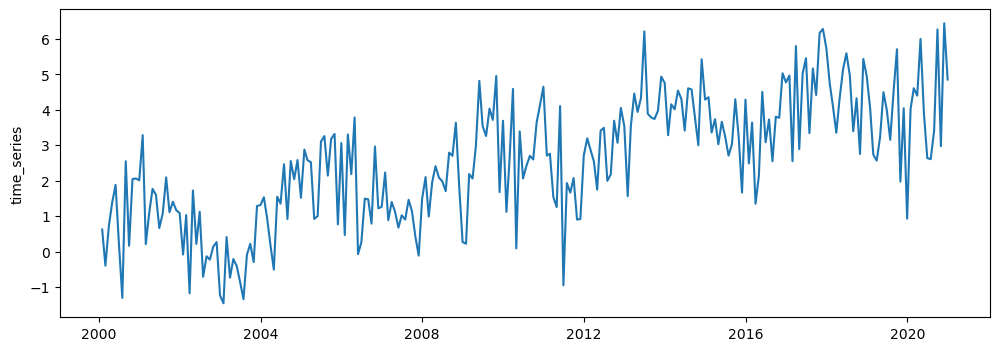

In [10]:
ts.lineplot()

# Time Series Analysis

These next section will explore **Seasonal, Trend and Residual (STL)** models, consisting of:

- Trend removals with a LOESS regression model. 
- Seasonal component removals using regression on periodic components.
- Leaving a remainder known as the Residual. 

This study applies an **additive** approach, $TS(t) = S(t) + T(t) + R(t)$.

Reference: https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html


Important parameters:
- **p** Auto Regressive (AR) order.
- **d** number of differences.
- **q** order of Moving Average (MA).
- **P** seasonal AR term order. Autoregressive component with period **M**.  
- **D** order of differencing for non-stationary behavior. 
- **Q** seasonal MA term order. Mving average component with period **M**. 
- **S** period length.


# Plot histogram and Q-Q

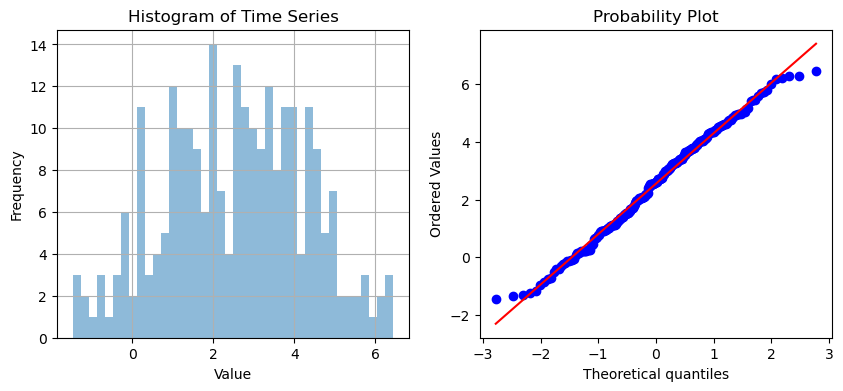

In [11]:
## OO method TimeSeries.plot_hist_qq
ts.plot_hist_qq('Time Series')

# Plot ACF and PACF

lags =  84


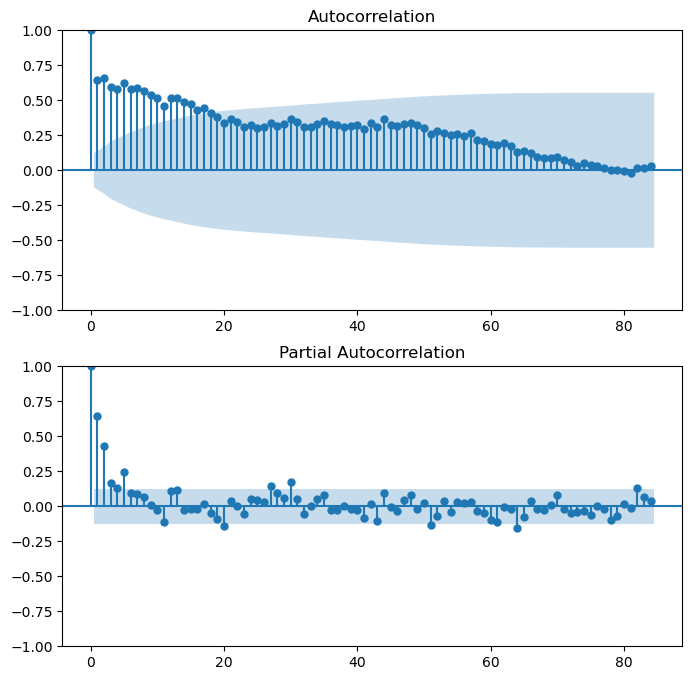

In [12]:
ts.acf_pacf_plots()

# ADF stationary test

In [13]:
ts.test_ADF_stationary()

ADF test statistic = -1.787614367034451
p-value = 0.3866279225422781
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
*** Time series is non-stationary.
*** Failed to reject the null hypothesis (H0). Either p-value > 0.05, or t-test 5% conf interval < test static.
Number of lags used = 5


{'test_stat': -1.787614367034451,
 'p-value': 0.3866279225422781,
 'lags': 5,
 't-value_10%_conf': -2.5730700760129555,
 't-value_5%_conf': -2.873361841566324,
 't-value_1%_conf': -3.457215237265747}

# _Histogram, Q-Q, ACF and PACF obeservation_

> - Histogram and Q-Q show that this is **nearly a Normal distribution.** it is very close.
> - The time series is **non-stationary.**
> - It looks like a **Random Walk.** 
> - The **ACF** has a very **slow decay**, but it eventually reaches zero.
> - While the **confidence intervals** of the ACF increase, they tend to become stable.
> - The PACF exhibits **correlation** in several observations 3 or 4 (adjacent to zero).
> - The PACF appears to show **some periodicity**.

# Decompose the time series

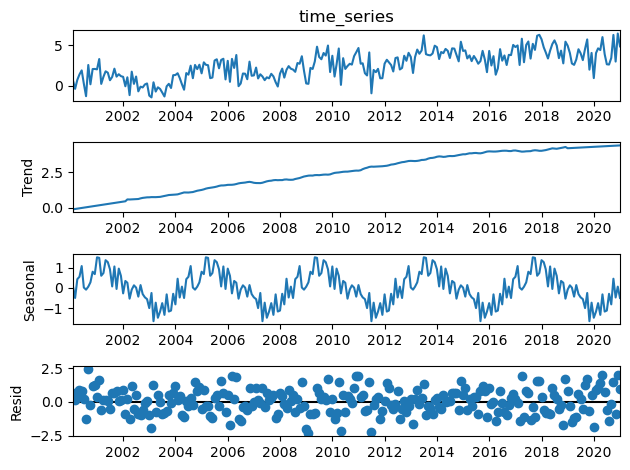

In [14]:
# Make period based on observation from decomposed residual (tested 20, 17*, 15, 10, 5 year periods)
decomp_ts = ts.decompose(extrapolate_trend='freq', period=50)

# Instantiate residuals object

In [15]:
ts_res = TimeSeries(decomp_ts.resid)

##### _Plot residuals histogram and Q-Q_

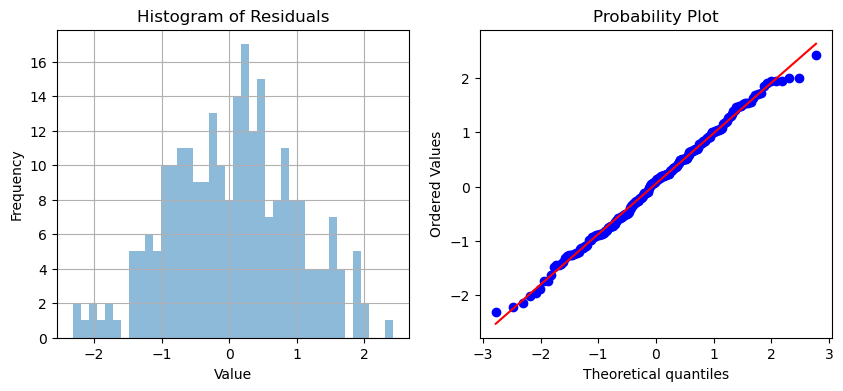

In [16]:
## OO method TimeSeries.plot_hist_qq
ts_res.plot_hist_qq('Residuals')

##### _Plot residuals ACF and PACF_

lags =  84


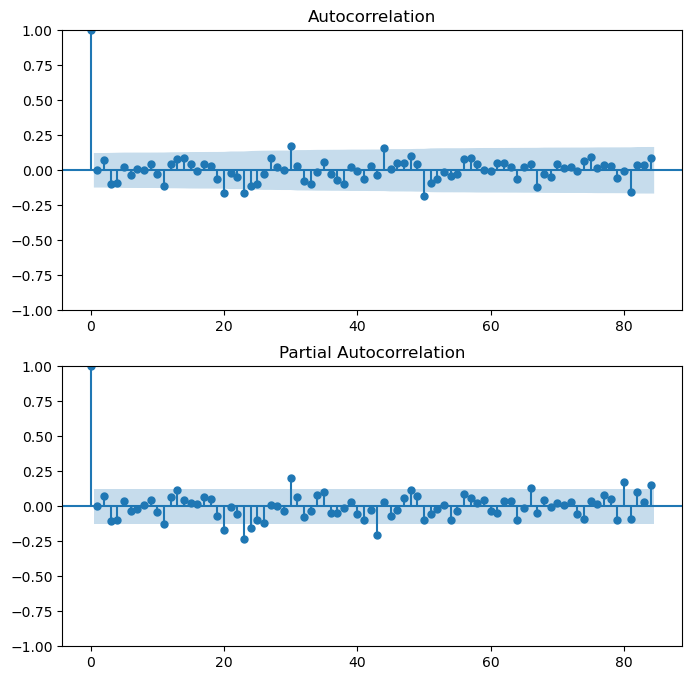

In [17]:
ts_res.acf_pacf_plots()

##### _Residuals ADF stationary test_

In [18]:
ts_res.test_ADF_stationary()

ADF test statistic = -8.849606175755772
p-value = 1.5860611566277356e-14
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
*** Time series is stationary.
*** Reject the null hypothesis (H0). Both p-value <= 0.05, and t-test 5% conf interval > test static.
Number of lags used = 3


{'test_stat': -8.849606175755772,
 'p-value': 1.5860611566277356e-14,
 'lags': 3,
 't-value_10%_conf': -2.573018897632674,
 't-value_5%_conf': -2.8732659015936024,
 't-value_1%_conf': -3.4569962781990573}

##### _Residuals histogram, Q-Q, ACF and PACF obeservation_

> - Histogram and Q-Q show **Normal distribution** characteristics.
> - The time series is **stationary.**
> - The time series looks could be **white noise**.
> - The **ACF** decays rapidly.
> - The ACF exhibits **no correlation** in observation 1 (adjacent to zero).
> - The ACT **confidence intervals** tend to become stable.
> - The PACF exhibits **no correlation** in observation 1 (adjacent to zero).
> - The PACF appears to be **periodical** or it may be **random**.

##### _Auto ARIMA residuals_

Apply the *auto_arima()* to the residual **stationary** model. Use an exogenous series on the auto_arima() model.

In [19]:
##
# BIC tests
#
# http://alkaline-ml.com/pmdarima/1.0.0/modules/generated/pmdarima.arima.auto_arima.html
# https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

ts_res_best_model = ts_res.auto_arima(exogenous=None, start_p=1, start_q=1, max_p=3, max_q=3, m=10,
                       start_P=0, seasonal=True, d=1, D=1, trace=True, 
                       information_criterion = 'bic', stepwise=True)

Performing stepwise search to minimize bic
 ARIMA(1,1,1)(0,1,1)[10]             : BIC=inf, Time=1.18 sec
 ARIMA(0,1,0)(0,1,0)[10]             : BIC=978.815, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[10]             : BIC=868.139, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[10]             : BIC=711.965, Time=0.77 sec
 ARIMA(0,1,1)(0,1,0)[10]             : BIC=inf, Time=0.33 sec
 ARIMA(0,1,1)(1,1,1)[10]             : BIC=717.298, Time=0.93 sec
 ARIMA(0,1,1)(0,1,2)[10]             : BIC=717.183, Time=1.27 sec
 ARIMA(0,1,1)(1,1,0)[10]             : BIC=inf, Time=0.99 sec
 ARIMA(0,1,1)(1,1,2)[10]             : BIC=inf, Time=2.15 sec
 ARIMA(0,1,0)(0,1,1)[10]             : BIC=859.509, Time=0.24 sec
 ARIMA(0,1,2)(0,1,1)[10]             : BIC=inf, Time=0.75 sec
 ARIMA(1,1,0)(0,1,1)[10]             : BIC=inf, Time=0.48 sec
 ARIMA(1,1,2)(0,1,1)[10]             : BIC=722.752, Time=1.19 sec
 ARIMA(0,1,1)(0,1,1)[10] intercept   : BIC=inf, Time=2.34 sec

Best model:  ARIMA(0,1,1)(0,1,1)[10]          
Total fit tim

In [20]:
ts_res_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  252
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 10)   Log Likelihood                -347.755
Date:                            Fri, 02 Feb 2024   AIC                            701.510
Time:                                    15:24:40   BIC                            711.965
Sample:                                01-31-2000   HQIC                           705.722
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9899      0.048    -20.747      0.000      -1.083      -0.896
ma.S.L10      -0.8986      0.053    -17.041      0.000      -1.002      -0.795
sigma2         0.9517      0.095      9.968      0.000       0.765       1.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.31
Prob(Q):                              0.96   Prob(JB):                         0.86
Heteroskedasticity (H):               1.27   Skew:                            -0.03
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### _Takeaways from SARIMAX_

> **Residuals:**
> - SARIMAX model order p, d, q, and seasonal P, D, Q, S (3, 1, 0) (2, 1, 0, 5).
> - *p* 3 indicatates there is strong autocorrelation.
> - *d* 1 is low given that this is a stationary series.
> - *q* 0 no Moving Average.
> - *P* 2 seasonal autocorrelation strong.
> - *D* 1 also low given this is stationary.
> - *Q* 0 no Moving Average.


(200,)
(52, 1)
Test RMSE: 1.783


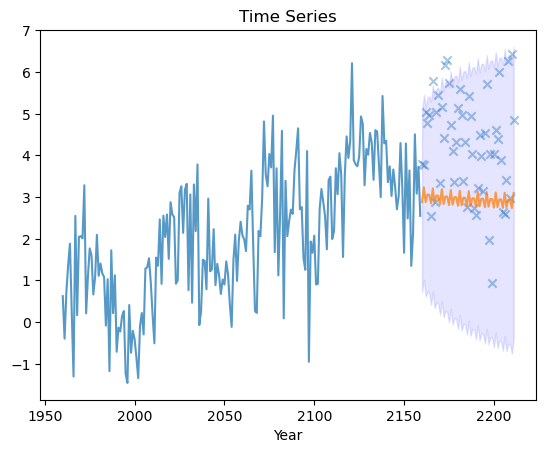

In [21]:
title = 'Time Series'

train, test = ts.get_train_test()

# Train exog
train_exog = pd.DataFrame(train)
print(train.shape)
# Test exog
test_exog = pd.DataFrame(test)
print(test_exog.shape)

# Based on the instantied time series, where the train and test sets came from.
preds, conf_int = ts.predict(train_exog, test_exog, trace=False)
ts.predict_plot(preds, conf_int, title=title)